# Car Price Prediction Using Linear Regression
#### This is a project for building a linear regression model that is used to predict used car prices from a given dataset using machine learning. The dataset used for this project is taken from Kaggle. 

In [37]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
cars = pd.read_csv('car data.csv')

In [39]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### No Null-Values present in data

In [42]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Visualising Data

In [43]:
fuel = cars['Fuel_Type']
seller = cars['Seller_Type']
transmission = cars['Transmission']
selling = cars['Selling_Price']

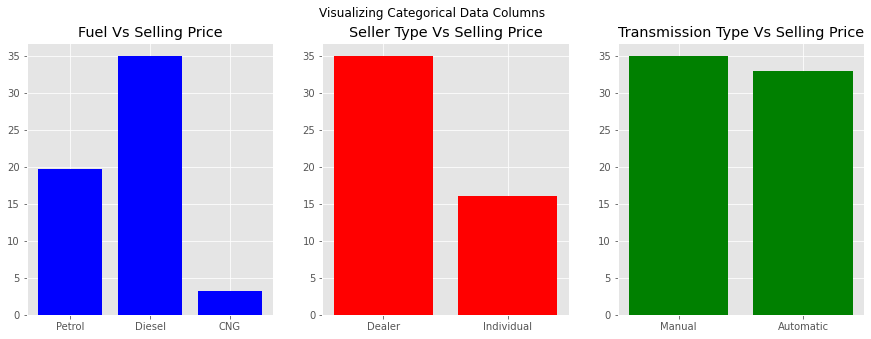

In [44]:

fig = plt.figure(figsize = (15,5))
fig.suptitle('Visualizing Categorical Data Columns')
plt.subplot(1,3,1)
plt.bar(fuel,selling, color='blue')
plt.title('Fuel Vs Selling Price')
plt.subplot(1,3,2)
plt.bar(seller ,selling, color='red')
plt.title('Seller Type Vs Selling Price')
plt.subplot(1,3,3)
plt.bar(transmission,selling, color='green')
plt.title('Transmission Type Vs Selling Price')
plt.show()


### Converting categorical data into numerical data

In [45]:
cars.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
cars.replace({'Seller_Type':{'Dealer':1, 'Individual':0}}, inplace = True)
cars.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [49]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,0,0
297,brio,2015,4.00,5.90,60000,0,1,0,0
298,city,2009,3.35,11.00,87934,0,1,0,0
299,city,2017,11.50,12.50,9000,1,1,0,0


### Creating Correlation Heat Map

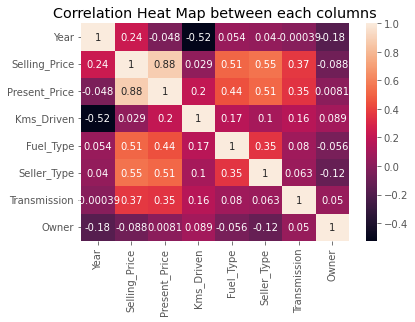

In [50]:
sns.heatmap(cars.corr(), annot = True)
plt.title('Correlation Heat Map between each columns')
plt.show()

#### Selling Price and Present Price are highly correlated

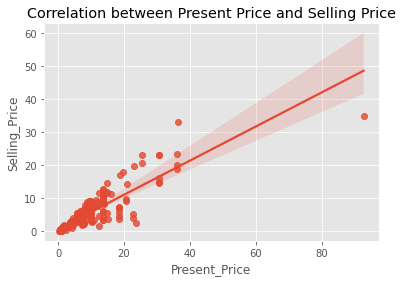

In [51]:
sns.regplot(x='Present_Price',y='Selling_Price',data=cars)
plt.title("Correlation between Present Price and Selling Price")
plt.show()

In [55]:
#Creating x and y datasets for our model 
x = cars.drop(["Car_Name","Selling_Price"],axis=1)
y = cars["Selling_Price"]

### Splitting Data

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

#### Normalizing our data Using Standard Scaler

In [62]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Training Our Model

In [63]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Evaluating Our Model

In [66]:
prediction = model.predict(x_test)
print("Mean Absolute Error: ", metrics.mean_absolute_error(prediction,y_test))
print("Mean Square Error: ", metrics.mean_squared_error(prediction,y_test))
print("R2 Score: ", metrics.r2_score(prediction,y_test))


Mean Absolute Error:  1.2319533008766879
Mean Square Error:  3.4579538458337904
R2 Score:  0.8528582949898238


### Regression Plot

TypeError: 'str' object is not callable

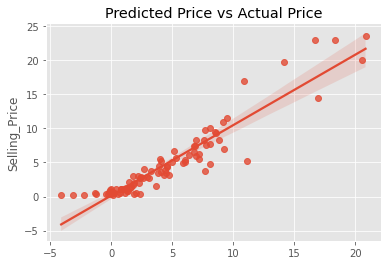

In [70]:
sns.regplot(x=prediction,y=y_test)
plt.title("Predicted Price vs Actual Price")
plt.show()